### Assignment 1
### Student ID: 34116478
### Student Name: Qi Zhou

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import zero_one_loss, log_loss
from scipy.stats import multivariate_normal
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# S3.  Ridge Regression and Logistic Regression versus Bayes Classifier

## Question 4: Ridge Regression

# 4.1 Derive the weight update steps of stochastic gradient descent (SGD)

# Derivation of Weight Update Steps for Stochastic Gradient Descent (SGD) with L2 Regularization

To derive the weight update steps for linear regression with L2 regularization using stochastic gradient descent (SGD), we start by defining the regularized error function and proceed to derive the gradient, which will be used to update the weights.

## 1. Regularized Error Function

The regularized error function $E(\mathbf{w})$ for linear regression with L2 regularization is defined as follows:

$$
E(\mathbf{w}) = \frac{1}{2n} \sum_{i=1}^{n} \left( t_i - \mathbf{x}_i \cdot \mathbf{w} \right)^2 + \frac{\lambda}{2} \|\mathbf{w}\|^2
$$

where:

- $n$ is the number of training samples.
- $t_i$ is the true target value for the $i$-th sample.
- $\mathbf{x}_i$ is the feature vector for the $i$-th sample.
- $\mathbf{w}$ is the weight vector (the model parameters).
- $\lambda$ is the regularization parameter controlling the strength of the L2 penalty.

The first term in the equation is the mean squared error (MSE) of the linear regression model, and the second term is the L2 regularization term, also known as the ridge penalty.

## 2. Gradient of the Regularized Error Function

To find the weight update rule, we need to compute the gradient of the regularized error function with respect to the weight vector $\mathbf{w}$. The gradient of $E(\mathbf{w})$ is given by:

$$
\nabla E(\mathbf{w}) = -\frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_i \left( t_i - \mathbf{x}_i \cdot \mathbf{w} \right) + \lambda \mathbf{w}
$$

The first term in the gradient is the gradient of the MSE, and the second term is the gradient of the L2 regularization term.

## 3. Stochastic Gradient Descent (SGD) Weight Update Rule

In stochastic gradient descent, we do not compute the gradient over the entire dataset at once (as in batch gradient descent), but rather compute it for a single example or a small batch of examples. For a single example $(\mathbf{x}_i, t_i)$, the gradient becomes:

$$
\mathbf{g}_i(\mathbf{w}) = -\mathbf{x}_i \left( t_i - \mathbf{x}_i \cdot \mathbf{w} \right) + \lambda \mathbf{w}
$$

Using this gradient, the weight update rule in SGD can be expressed as:

$$
\mathbf{w}_{\tau} = \mathbf{w}_{\tau-1} - \eta \left( -\mathbf{x}_i \left( t_i - \mathbf{x}_i \cdot \mathbf{w}_{\tau-1} \right) + \lambda \mathbf{w}_{\tau-1} \right)
$$

where:

- $\mathbf{w}_{\tau-1}$ is the weight vector at the previous iteration.
- $\eta$ is the learning rate.

Simplifying the weight update rule:

$$
\mathbf{w}_{\tau} = \mathbf{w}_{\tau-1} + \eta \mathbf{x}_i \left( t_i - \mathbf{x}_i \cdot \mathbf{w}_{\tau-1} \right) - \eta \lambda \mathbf{w}_{\tau-1}
$$

This update rule consists of two parts:

1. **Gradient of the error function**: $\eta \mathbf{x}_i \left( t_i - \mathbf{x}_i \cdot \mathbf{w}_{\tau-1} \right)$
2. **Regularization penalty**: $- \eta \lambda \mathbf{w}_{\tau-1}$

The first part adjusts the weights to minimize the prediction error, and the second part penalizes large weights to prevent overfitting.

## 4. System of Linear Equations

Alternatively, we can find the optimal weight vector \( w^* \) by solving a system of linear equations derived from setting the gradient of the regularized error function to zero. This leads to the following normal equation:

$$
X^\top X w^* + \lambda w^* = X^\top y
$$

where:

-  X  is the matrix of input features.
-  y  is the vector of target values.

Solving this system of equations gives us the weight vector that minimizes the regularized error function. The regularization term$  \lambda w $ ensures that the solution is unique and helps in preventing overfitting by penalizing large weights.


## 5. Convergence to the Optimal Solution

For a sufficiently small learning rate $\eta$, the weights $\mathbf{w}_{\tau}$ will converge to the optimal solution $\mathbf{w}^*$, where the gradient $\nabla E(\mathbf{w}) = 0$. This corresponds to the point where the model minimizes the regularized error function.

The derived weight update step is crucial for implementing SGD in ridge regression, as it helps achieve a balance between fitting the data and controlling model complexity through regularization.

# 4.2 Using the analytically derived gradient from 4.1, implement either a direct or a gradient descent algorithm for Ridge Regression

In [2]:
class DirectLinearRegressorL2:
    """
    Implements direct linear regression with L2 regularization.

    Attributes:
    lambda_value (float): Regularization coefficient controlling the strength of regularization.
    coef_ (array): The fitted model parameters (i.e., regression coefficients).
    """
    
    def __init__(self, lambda_value=0.1):
        """
        Initializes the DirectLinearRegressorL2 object.

        Parameters:
        lambda_value (float): Regularization coefficient, default is 0.1.
                              When lambda_value is 0, it is equivalent to ordinary least squares linear regression.
        """
        self.lambda_value = lambda_value
        
    def fit(self, x, y):
        """
        Fits a linear model with L2 regularization based on the provided data.

        Parameters:
        x (array-like): Input feature data, shape (dataset_size, n_features).
        y (array-like): Target values (continuous variable), shape (dataset_size).

        Returns:
        self: Returns the model object with the fitted parameters.
        """
        # Compute the transpose of x multiplied by y, which is the right-hand side of the normal equation
        rhs = x.T.dot(y)
        
        # Compute the transpose of x multiplied by x, then add lambda multiplied by the identity matrix, which is the left-hand side of the normal equation
        # np.eye(x.shape[1]) creates an identity matrix with the same dimensions as the number of features in x
        lhs = x.T.dot(x) + self.lambda_value * np.eye(x.shape[1])
        
        # Solve the normal equation to find the optimal parameters
        self.coef_ = np.linalg.solve(lhs, rhs)
        
        return self
    
    def predict(self, x):
        """
        Predicts new data points using the fitted model.

        Parameters:
        x (array-like): New input data, shape (dataset_size, n_features).

        Returns:
        array: Prediction results, shape (dataset_size).
        """
        # Perform dot product on the input x and use the fitted coefficients to make predictions
        return x.dot(self.coef_)


In [3]:
class SGDLinearRegressorL2:
    """
    Stochastic Gradient Descent (SGD) linear regression model with L2 regularization.

    Attributes:
    batch_size (int): The number of samples used to compute the gradient during each iteration.
    eta (float): The learning rate, which determines the step size for parameter updates.
    tau_max (int): The maximum number of iterations.
    epsilon (float): The convergence threshold; the algorithm stops when the parameter changes are smaller than this value.
    random_state (int, optional): Random seed for reproducible sampling.
    lambda_para (float): The L2 regularization parameter, controlling the strength of regularization.
    """
    
    def __init__(self, batch_size=1, eta=0.01, tau_max=1000, epsilon=0.00001, random_state=36, lambda_para=2):
        self.batch_size = batch_size
        self.eta = eta
        self.tau_max = tau_max
        self.epsilon = epsilon
        self.random_state = random_state
        self.lambda_para = lambda_para
        self.coef_ = None  # Stores the model coefficients
        
    def fit(self, x, y):
        """
        Fit the SGD linear regression model.

        Parameters:
        x (np.array): Input feature data, shape (dataset_size, n_features).
        y (np.array): Target values, shape (dataset_size).

        Returns:
        self: Returns the model object with the fitted parameters.
        """
        rng = np.random.default_rng(self.random_state)
        dataset_size, n_features = x.shape
        
        # Initialize weights
        self.w_ = np.zeros(n_features)
        
        # Perform iterations
        for tau in range(1, self.tau_max + 1):
            indices = rng.choice(dataset_size, size=self.batch_size, replace=True)
            x_batch = x[indices]
            y_batch = y[indices]
            gradient = x_batch.T @ (x_batch @ self.w_ - y_batch) / self.batch_size + self.lambda_para * self.w_
            self.w_ -= self.eta * gradient
            
            # Check for convergence
            if np.linalg.norm(self.w_ - self.coef_) < self.epsilon:
                self.coef_ = self.w_
                break
            
            self.coef_ = self.w_
        
        return self
                                
    def predict(self, x):
        """
        Predict new data points using the fitted model.

        Parameters:
        x (np.array): New input data, shape (dataset_size, n_features).

        Returns:
        np.array: Prediction results, shape (dataset_size,).
        """
        return x @ self.coef_


## 4.3.a Consider the ridge regression model 

## Study on the Effects of L2 Regularization (Ridge Regression)

We investigate the impact of L2 regularization on training and testing errors using synthetically generated data. The synthetic data generator creates data based on the following model:

$$
X \sim \text{Uniform}(-0.3, 0.3)
$$
$$
Y = \frac{\sin(5 \pi x)}{1 + 2x} + \epsilon
$$
$$
\epsilon \sim \mathcal{N}(0, 0.1)
$$

### Ridge Regression with Polynomial Features
To analyze the regularization effects, a ridge regression model is used with varying regularization strength \( \lambda \). The model setup includes a polynomial feature transformer of degree 5. 



In [4]:
def f(x):
    """
    Define a mathematical function with oscillatory and nonlinear characteristics.

    Parameters:
    x (array-like): Input values, typically a NumPy array.

    Returns:
    array: Computed function values.
    """
    return np.sin(5 * np.pi * x) / (1 + 2 * x)

def make_additive_noise_data(n, f, a, b, noise=0.1**0.5, random_state=36):
    """
    Generate a dataset with additive Gaussian noise.

    Parameters:
    n (int): Number of data points to generate.
    f (function): Function used to generate data.
    a (float): Start of the data generation interval.
    b (float): End of the data generation interval.
    noise (float): Standard deviation of the additive noise, default is 0.316 (square root of 0.1).
    random_state (int, optional): Seed for the random number generator to ensure reproducibility.

    Returns:
    tuple: A tuple containing two NumPy arrays, the first is the generated x values, and the second is the corresponding noisy y values.
    """
    rng = np.random.default_rng(random_state)
    x = rng.uniform(a, b, size=n).reshape(-1, 1)
    y = f(x) + rng.normal(0, noise, size=x.shape)
    return x, y

def plot_function(f, a, b, models=[], data=None, ax=None, ax_labels=True, legend=True):
    """
    Plot a mathematical function and model predictions.

    Parameters:
    f (function): The mathematical function to plot.
    a (float): Start value of the x-axis.
    b (float): End value of the x-axis.
    models (list of models, optional): A list of predictive models to display their predictions on the function plot.
    data (tuple, optional): A tuple containing x and y arrays to plot as scatter points.
    ax (matplotlib.axes.Axes, optional): The axes on which to plot.
    ax_labels (bool, optional): Whether to add axis labels.
    legend (bool, optional): Whether to show the legend.
    """
    if ax is None:
        ax = plt.gca()

    xx = np.linspace(a, b, 200).reshape(-1, 1)
    
    # Plot the function
    ax.plot(xx, f(xx), color="black", label='$f(x)$')

    # Plot model predictions
    for idx, model in enumerate(models):
        predictions = model.predict(xx)
        ax.plot(xx, predictions, label=f'Model {idx + 1}', alpha=0.5)

    # Plot data points
    if data is not None:
        ax.scatter(data[0], data[1], color='red', alpha=0.5, label='Data points')

    # Set legend and labels
    if legend:
        ax.legend()
    if ax_labels:
        ax.set_xlabel('x')
        ax.set_ylabel('y')

    # Show the plot
    plt.show()

# Example usage:
# x, y = make_additive_noise_data(100, f, 0, 1)
# plot_function(f, 0, 1, data=(x, y))


In [5]:
lambda_value = [10**(-10 + 9*i/100) for i in range(0,101)]
#lambda_value

In [6]:
TRAIN_SIZE = 10000
TEST_SIZE = 3000

In [7]:
x_train, y_train = make_additive_noise_data(TRAIN_SIZE, f, -0.3, 0.3, random_state= 36)
x_test, y_test = make_additive_noise_data(TEST_SIZE, f, -0.3, 0.3, random_state = 36)

In [8]:
poly = PolynomialFeatures(5)

In [9]:
transormation_then_linear = [Pipeline(steps=[("PolyDegree", poly), ("ridgeRegression", DirectLinearRegressorL2(lambda_value=each))]) for each in lambda_value]

In [10]:
transormation_then_linear[0]

Pipeline(steps=[('PolyDegree', PolynomialFeatures(degree=5)),
                ('ridgeRegression',
                 <__main__.DirectLinearRegressorL2 object at 0x000001EBD08279A0>)])

# 4.3.b Fit each model at least ten times  for each repetition all models use the same training dataset

## Study Design and Mathematical Formulation

### Objective
The objective is to evaluate the impact of L2 regularization on model performance using the mean squared error (MSE) metric.

### Mean Squared Error (MSE)
The MSE is calculated for each model configuration as follows:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
where \(n\) is the number of samples, \(y_i\) is the true value, and \(\hat{y}_i\) is the predicted value by the model.

### Experimental Setup
- **Resampling Strategy**: For each lambda value, fit each model at least ten times using resampled training datasets of size 20.
- **Consistency**: To ensure consistency and reduce variance in the experiment:
  - Perform model training for each lambda as an inner loop.
  - Resample the training dataset once per outer loop iteration and use this dataset across all lambda configurations.

### Regularization Parameter Range
Lambda values are tested over a logarithmic scale:
$$
\lambda \in \{10^{-10 + 9i/100} : 0 \leq i \leq 100\}
$$
This provides a comprehensive view over a range from very light to relatively strong regularization effects.

### Implementation Note
Ensure that all models use the same randomly resampled training dataset for each of the ten repetitions to maintain experimental control and reliability.


In [11]:
def run(lambda_value, pipelines):
    """
    Run multiple data processing pipelines and evaluate their performance.

    Parameters:
    lambda_value (float): Regularization parameter, used to adjust the strength of regularization.
    pipelines (list): A list containing multiple preprocessing and learning pipelines.

    Returns:
    tuple: Two lists containing the average training and testing mean squared errors for each pipeline.
    """
    l2_mse_train = []  # Store the average training mean squared error for each pipeline
    l2_mse_test = []   # Store the average testing mean squared error for each pipeline
    min_mse = None     # Initialize the minimum mean squared error
    best_l2 = None     # Best regularization parameter value
    best_model = None  # Best model

    # Iterate through all pipelines
    for eachpipe in pipelines:
        mse_train = 0
        mse_test = 0
        # Repeat the experiment 10 times to stabilize the performance evaluation
        for i in range(1, 11):
            # Stack the features and targets of the training data together
            xAndy = np.hstack((x_train, y_train.reshape(y_train.shape[0], 1)))
            # Randomly resample 20 samples from the stacked data
            sampled_data = resample(xAndy, n_samples=20, random_state=36)
            x_train_sampled = sampled_data[:, :-1]
            y_train_sampled = sampled_data[:, -1:]
            # Train the model on the resampled data
            model = eachpipe.fit(x_train_sampled, y_train_sampled)
            # Predict on the test set
            y_test_pred = model.predict(x_test)
            # Predict on the training set samples
            y_train_pred = model.predict(x_train_sampled)
            # Accumulate mean squared error
            mse_test += np.sum(mean_squared_error(y_test, y_test_pred))
            mse_train += np.sum(mean_squared_error(y_train_sampled, y_train_pred))
        
        # Compute the average mean squared error over the 10 experiments
        mse_test /= 10
        mse_train /= 10
        l2_mse_train.append(mse_train)
        l2_mse_test.append(mse_test)

    return l2_mse_train, l2_mse_test

# Example usage
l2_mse_train, l2_mse_test = run(lambda_value, transormation_then_linear)


In [12]:
def run_experiment(lambda_value, repetitions, pipelines):
    l2_mse_train = []
    l2_mse_test = []

    for i in range(repetitions):
        # Resample training data for each repetition
        xAndy = np.hstack((x_train, y_train.reshape(y_train.shape[0], 1)))
        sampled_data = resample(xAndy, n_samples=20, random_state=36)
        x_train_sampled = sampled_data[:, :-1]
        y_train_sampled = sampled_data[:, -1:]

        for lambda_idx, pipeline in enumerate(pipelines):
            pipeline.fit(x_train_sampled, y_train_sampled)
            y_test_pred = pipeline.predict(x_test)
            y_train_pred = pipeline.predict(x_train_sampled)

            if len(l2_mse_test) <= lambda_idx:
                l2_mse_test.append(np.sum(mean_squared_error(y_test, y_test_pred)))
                l2_mse_train.append(np.sum(mean_squared_error(y_train_sampled, y_train_pred)))
            else:
                l2_mse_test[lambda_idx] += np.sum(mean_squared_error(y_test, y_test_pred))
                l2_mse_train[lambda_idx] += np.sum(mean_squared_error(y_train_sampled, y_train_pred))

    # Calculate average MSE across repetitions
    l2_mse_test = [mse / repetitions for mse in l2_mse_test]
    l2_mse_train = [mse / repetitions for mse in l2_mse_train]

    return l2_mse_train, l2_mse_test

# 定义重复实验的次数
repetitions = 10


# 调用run_experiment函数
l2_mse_train, l2_mse_test = run_experiment(lambda_value, repetitions, transormation_then_linear)

# 4.3.c Create a plot of mean squared errors


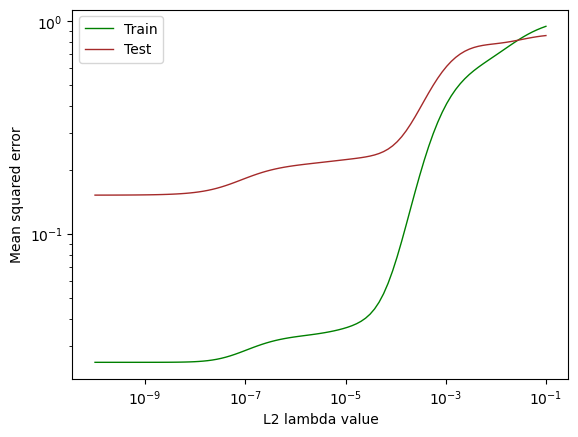

In [13]:
plt.plot(lambda_value, l2_mse_train, linewidth = 1, color = "green", label = "Train")
plt.plot(lambda_value, l2_mse_test, linewidth = 1, color = "brown", label = "Test")
plt.xlabel('L2 lambda value')
plt.ylabel("Mean squared error")
plt.xscale('log')
plt.yscale('log')
plt.legend()

### Discussion on λ, Model Complexity, and Error Rates

The relationship between the regularization parameter $\lambda$, model complexity, and error rates can be understood by observing the plotted Mean Squared Errors (MSE) for the training and testing datasets as a function of $\lambda$.

#### 1. **Effect of $\lambda$ on Model Complexity:**

- **Small $\lambda$ values**: When $\lambda$ is close to 0, the regularization effect is minimal. The model is primarily focused on minimizing the training error, which leads to a more complex model with larger weights. This increased model complexity can lead to **overfitting**, where the model fits the training data very well but fails to generalize to unseen data (higher test error).

- **Large $\lambda$ values**: As $\lambda$ increases, the regularization term starts to dominate the loss function, penalizing large weights more strongly. This results in a simpler model with smaller weights, which reduces the model's flexibility. While this can reduce the risk of overfitting, it can also lead to **underfitting**, where the model is too simple to capture the underlying patterns in the data, leading to higher training and test errors.

#### 2. **Underfitting and Overfitting:**

- **Overfitting (Low $\lambda$)**: When $\lambda$ is small, the model is more complex and closely follows the noise in the training data. This is evident from the lower training error but higher test error, indicating poor generalization.

- **Underfitting (High $\lambda$)**: When $\lambda$ is large, the model becomes too simple, potentially even linearizing complex relationships in the data. Both the training and test errors increase, indicating that the model is not capturing the necessary information from the data, resulting in underfitting.

#### 3. **Optimal $\lambda$:**

- The optimal $\lambda$ value strikes a balance between underfitting and overfitting, leading to a model that generalizes well to unseen data. This is typically observed where the test error is minimized, and the gap between training and test errors is reasonably small.

#### 4. **Observations from the Plot:**

- **Low $\lambda$ Region**: In this region, you may observe that the training error is low, but the test error is relatively high, which is indicative of overfitting.

- **High $\lambda$ Region**: As $\lambda$ increases, both training and test errors start to rise, signifying underfitting.

- **Middle $\lambda$ Region**: Somewhere in the middle, there is a sweet spot where the test error reaches its minimum, indicating the optimal balance between model complexity and regularization, thus reducing both underfitting and overfitting.

In summary, choosing an appropriate $\lambda$ value is crucial for achieving a model that generalizes well. Too small a $\lambda$ might cause overfitting, while too large a $\lambda$ can lead to underfitting. The goal is to find the $\lambda$ value that minimizes the test error, indicating good generalization.